<h3> LAB 8 - Processamento de Imagem</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
from pylab import *
from scipy.signal import *
import cv2 

<b>Escolha uma imagem qualquer. Pode ser colorida ou monocromática.</b><br>

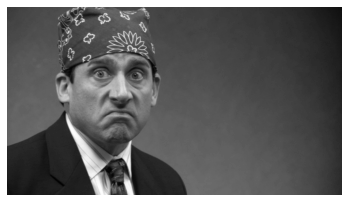

In [2]:
# Importa a imagem em modo monocromático
#img = cv2.imread('shuttle_80x60.tif',0)
#img = cv2.imread('lenna512.tif',0)
img = cv2.imread('Prisonmike.png',0)
axis('off')
imshow(img,cmap='gray');

<b>1) Plote o histograma das intensidades dos pixels.</b>

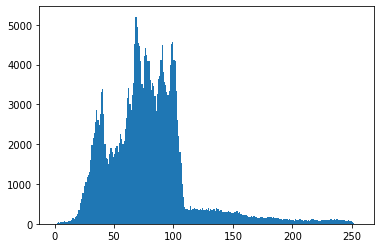

In [3]:
# "Achata" a imagem em um vetor de linha única e plota o histograma com 256 bins
hist(img.ravel(),256,[0,256])
show()

<b>2) Equalize o histograma e plote o histograma equalizado juntamente com o histograma original. Mostre a imagem original e equalizada, lado a lado.</b>

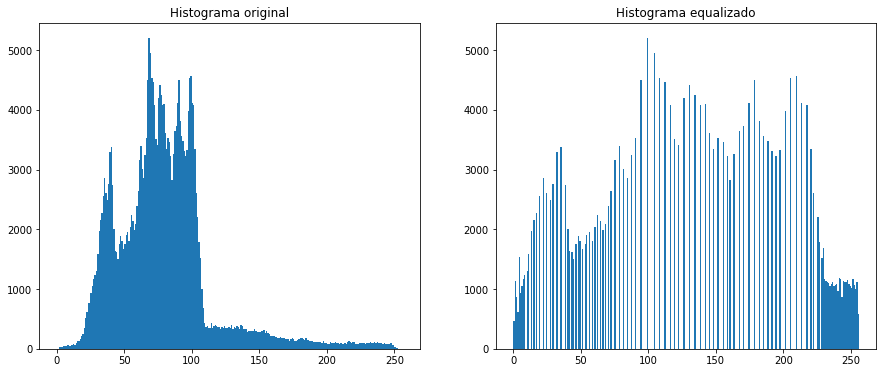

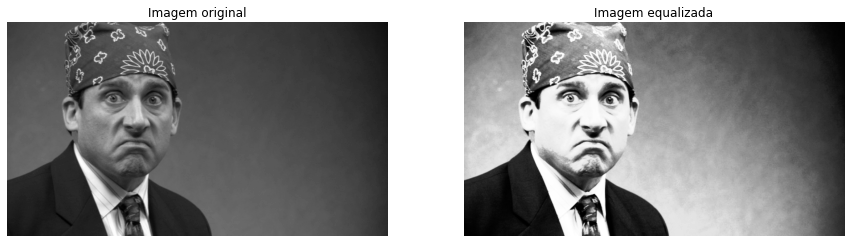

In [4]:
# Equaliza a imagem
img_eq = cv2.equalizeHist(img)

# "Achata as imagens" e plota os histogramas
fig, (ax1,ax2) = subplots(1,2,figsize=(15,6))
ax1.hist(img.ravel(),256,[0,256])
ax1.set_title('Histograma original')
ax2.hist(img_eq.ravel(),256,[0,256])
ax2.set_title('Histograma equalizado')
show()

# Plota as imagens original e equalizada
fig, (ax1,ax2) = subplots(1,2,figsize=(15,6))
ax1.axis('off')
ax1.imshow(img,cmap='gray')
ax1.set_title('Imagem original')
ax2.axis('off')
ax2.imshow(img_eq,cmap='gray')
ax2.set_title('Imagem equalizada')
show()

Observa-se que na imagem equalizada, alguns pontos nos quais a figura está mais clara ou escura do que na original. Isto pode ser associado ao fato de que o processo de equalização distribui os bits de maneira a ocupar de forma mais equilibrada todos os bins, incluindo os extremos da escala. 

<b>3) Projeto um filtro passa-baixa (2D) e aplique na imagem. Mostre a imagem original, filtrada, e a reposta ao impulso do filtro (PSF) do filtro lado a lado. Mostre a resposta em frequência do filtro, a transformada de Fourier da imagem original, a transformada de Fourier da imagem filtrada, lado a lado.</b>

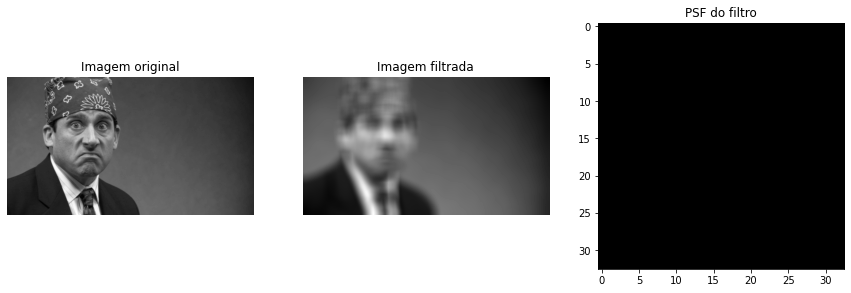

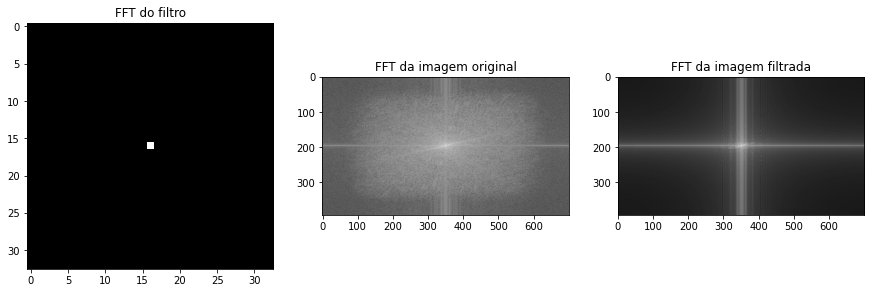

In [5]:
# Filtro normalizado NxN
# Quanto maior o N, mais seletivo o filtro
N = 33
kernel_LP = ones((N,N),float32)

# Normaliza o filtro com base em suas dimensões
kernel_LP = kernel_LP/sum(kernel_LP)

# Aplica o filtro passa-baixa por convolução
img_LPF = convolve2d(img, kernel_LP, boundary='symm', mode="same")

# FFT bidimensional das imagens e do filtro
img_fft = abs(fftshift(fft2(img)))
LP_fft = abs(fftshift(fft2(kernel_LP)))
img_LPF_fft = abs(fftshift(fft2(img_LPF)))

# Como os valores centrais da FFT das imagens tende
# ao infinito, a documentation da biblioteca recomenda 
# aplicar escala log na plotagem das magnitudes
mag_img = 20*log(img_fft)
mag_img_LPF = 20*log(img_LPF_fft)

# Plota a imagem original, filtrada e a PSF do filtro
fig, (ax1,ax2,ax3) = subplots(1,3,figsize=(15,6))
ax1.axis('off')
ax1.imshow(img,cmap='gray')
ax1.set_title('Imagem original')
ax2.axis('off')
ax2.imshow(img_LPF,cmap='gray')
ax2.set_title('Imagem filtrada')
ax3.imshow(kernel_LP,cmap='gray')
ax3.set_title('PSF do filtro')
show()

# Plota a FFT das imagens (escala log) e do filtro
fig, (ax1,ax2,ax3) = subplots(1,3,figsize=(15,6))
ax1.imshow(LP_fft,cmap='gray')
ax1.set_title('FFT do filtro')
ax2.imshow(mag_img,cmap='gray')
ax2.set_title('FFT da imagem original')
ax3.imshow(mag_img_LPF,cmap='gray')
ax3.set_title('FFT da imagem filtrada')
show()

Vemos na imagem filtrada que a suavização causada pelo filtro passa-baixa resultou em uma imagem com variações de coloração de pixel muito mais suaves. Conforme maior o N selecionado, mais borrada a figura resultante fica, uma vez que o filtro se torna mais seletivo, atenuando uma faixa de frequências cada vez maior. 

A resposta ao impulso do filtro, espacialmente é um quadrado da cor preta, uma vez que é composta de uma máscara (kernel) de valores constantes. Aplicando a Transformada Rápida de Fourier (FFT) neste filtro, vemos que na frequência a banda de passagem é representada por um quadrado branco nas baixas frequências, na qual os valores dos bits são inalterados. Conforme maior o N, menor este quadrado branco.

Observando a FFT da imagem original e da filtrada, vemos que a máscara atenuou principalmente as porções localizadas nas extremidades do espectro (vértices do retângulo da imagem), que correspondem as frequências mais altas. As frequências baixas nas abscissas e ordenadas formam uma cruz branca, indicando que essas regiões não sofreram atenuação do filtro.

<b>4) A partir de uma linha da imagem, mostre um gráfico da transformada de Fourier da imagem (linha) original, filtrada, e resposta em frequência do filtro.</b>

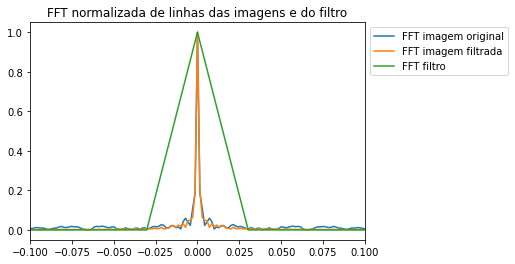

In [6]:
# Cria um vetor com somente a primeira linha de cada imagem
line_img = img[0]
line_img_LPF = img_LPF[0]

# Aplica a fft e cria vetores para as abscissas se alinharem
line_img_fft = fftshift(fft(line_img))
line_img_LPF_fft = fftshift(fft(line_img_LPF))
w_imgs = fftshift(fftfreq(len(line_img_fft)))
w_LP = fftshift(fftfreq(len(LP_fft)))

# Plota as ffts unidimensionais normalizadas
plot(w_imgs,abs(line_img_fft/max(line_img_fft)))
plot(w_imgs,abs(line_img_LPF_fft/max(line_img_LPF_fft)))
plot(w_LP,LP_fft[(int(N/2))])
plt.xlim([-0.1,0.1])
legend(['FFT imagem original', 
        'FFT imagem filtrada', 
        'FFT filtro'], 
        loc='upper left', bbox_to_anchor=(1,1))
title('FFT normalizada de linhas das imagens e do filtro')
show()

De forma arbitrária, foram selecionadas as primeiras linhas que compõem a matriz das imagens original e filtrada. Uma linha central do kernel do filtro foi selecionada, pois representa graficamente melhor o caráter passa-baixa da máscara. Os três sinais foram normalizados, pois o pico central das imagens tendem ao infinito, o que dificultava a visualização das harmônicas e da banda de passagem do filtro. 

Observa-se que a frequência central se manteve inalterada, uma vez que está completamente contida na banda de passagem do filtro. Pela normalização causada pelo filtro, as harmônicas contidas nesta banda não foram atenuadas, porém foram suavizadas. As harmônicas da imagem original que estão posicionadas além da frequência de corte foram severamente atenuadas, apresentando valores muito reduzidos após a filtragem por convolução.

<b>5) Projeto um filtro passa-alta (2D) e aplique na imagem. Mostre a imagem original, filtrada, e a reposta ao impulso do filtro (PSF) do filtro lado a lado. Mostre a resposta em frequência do filtro, a transformada de Fourier da imagem original, a transformada de Fourier da imagem filtrada, lado a lado.</b>

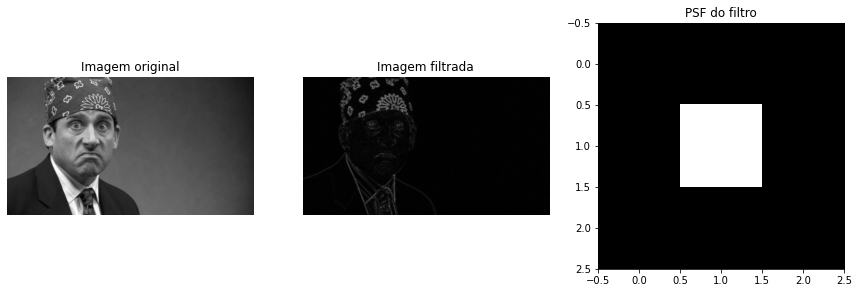

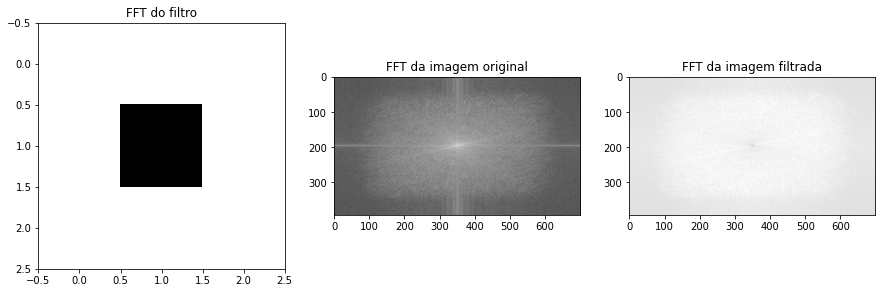

In [7]:
# Cria uma das topologias de filtro passa-alta 
# apresentadas nos slides do prof. Hélio Pedrini
kernel_HP = array([[-1.0, -1.0, -1.0], 
                   [-1.0, 8.0, -1.0],
                   [-1.0, -1.0, -1.0]])


# Aplica o filtro passa-alta por meio de convolução
img_HPF = convolve2d(img, kernel_HP, boundary='symm', mode="same")

# FFT bidimensional das imagens e do filtro
img_fft = abs(fftshift(fft2(img)))
HP_fft = abs(fftshift(fft2(kernel_HP)))
img_HPF_fft = abs(fftshift(fft2(img_HPF)))

# Como os valores centrais da FFT das imagens tende
# ao infinito, a documentation da biblioteca recomenda 
# aplicar escala log na plotagem das magnitudes
mag_img = 20*log(img_fft)
mag_img_HPF = 20*log(img_HPF_fft)

# Plota a imagem original, filtrada e a PSF do filtro
# Na imagem filtrda foi utilizado o comando absolute(), 
# conforme exemplo na documentation da função convolve2d()
fig, (ax1,ax2,ax3) = subplots(1,3,figsize=(15,6))
ax1.axis('off')
ax1.imshow(img,cmap='gray')
ax1.set_title('Imagem original')
ax2.axis('off')
ax2.imshow(absolute(img_HPF),cmap='gray')
ax2.set_title('Imagem filtrada')
ax3.imshow(kernel_HP,cmap='gray')
ax3.set_title('PSF do filtro')
show()

# Plota a FFT da imagem original, filtrada e do filtro
fig, (ax1,ax2,ax3) = subplots(1,3,figsize=(15,6))
ax1.imshow(HP_fft,cmap='gray')
ax1.set_title('FFT do filtro')
ax2.imshow(mag_img,cmap='gray')
ax2.set_title('FFT da imagem original')
ax3.imshow(mag_img_HPF,cmap='gray')
ax3.set_title('FFT da imagem filtrada')
show()

Observa-se que a imagem filtrada apresenta regiões claras onde na imagem original haviam contornos, ou seja regiões de maior detalhamento. Regiões estas que correspondem as porções de mais alta frequência na figura e portanto foram acentuadas na filtragem. 

A PSF (resposta ao impulso) do filtro corresponde a uma máscara de valor positivo no centro e negativo nas bordas. Ao aplicarmos a FFT neste filtro, o caráter passa-alta fica mais evidente: no domínio da frequência, um quadrado preto ocupa as frequências mais baixas e as demais regiões são brancas. Desta forma, o filtro atenua baixas frequências e preserva valores acima da frequência de corte.

Observando a FFT da imagem original e filtrada, vemos que o filtro passa-alta amplifica o valores acima da frequência de corte. Assim destacando as regiões de maiores transições de cores, que constituem os contornos de uma imagem. Os valores baixos de frequência, como tendem a


<b>6) A partir de uma linha da imagem, mostre um gráfico da transformada de Fourier da imagem (linha) original, filtrada, e resposta em frequência do filtro.</b>

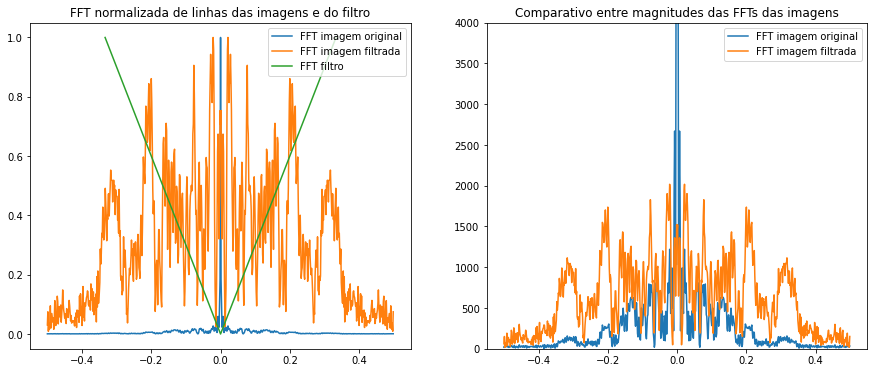

In [8]:
# Cria um vetor com somente a primeira linha de cada imagem
line_img = img[0]
line_img_HPF = img_HPF[0]
line_HPF_fft = HP_fft[(int(len(kernel_HP)/2))]

# Aplica a fft e cria vetores para as abscissas se alinharem
line_img_fft = abs(fftshift(fft(line_img)))
line_img_HPF_fft = abs(fftshift(fft(line_img_HPF)))
w_imgs = fftshift(fftfreq(len(line_img_fft)))
w_HP = fftshift(fftfreq(len(HP_fft)))

# Plota as ffts unidimensionais 

fig, (ax1,ax2) = subplots(1,2,figsize=(15,6))
ax1.plot(w_imgs,line_img_fft/max(line_img_fft))
ax1.plot(w_imgs,line_img_HPF_fft/max(line_img_HPF_fft))
ax1.plot(w_HP, line_HPF_fft/max(line_HPF_fft))
ax1.set_title('FFT normalizada de linhas das imagens e do filtro')
ax1.legend(['FFT imagem original', 
        'FFT imagem filtrada', 
        'FFT filtro'], 
        loc='upper right')

ax2.plot(w_imgs,line_img_fft)
ax2.plot(w_imgs,line_img_HPF_fft)
ax2.set_title('Comparativo entre magnitudes das FFTs das imagens')
ax2.set_ylim([0,4000])
ax2.legend(['FFT imagem original', 
        'FFT imagem filtrada'], 
        loc='upper right')
show()

Assim como para o filtro passa-baixa, foram selecionadas as primeiras linhas que compõem a matriz das imagens original e filtrada. Uma linha central do kernel do filtro foi selecionada, pois representa graficamente melhor o caráter passa-alta da máscara. Os três sinais foram normalizados no primeiro gráfico, pois o pico central das imagens tendem ao infinito, o que dificultava a visualização das harmônicas e da banda de passagem do filtro. Vemos que o sinal filtrado apresenta uma diferença muito menor entre as amplitudes centrais e suas harmônicas em comparação com a imagem original.

Podemos ver no segundo gráfico que na imagem original a frequência central tende ao infinito, porém após a convolução com a máscara, ela tem sua magnitude muito atenuada. Ela não é completamente anulada pois parte do kernel permite a passagem de frequências baixas. Também é possível ver que as harmônicas da banda central são amplificadas, de maneira que seus pixels ficam mais claros na imagem resultante.